<a href="https://colab.research.google.com/github/anjalikumari6246/Weather-Forcast/blob/main/Daily_Climate_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

importing the necessary Python libraries for data analysis and visualization

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error


Load the dataset

In [2]:
from google.colab import files

# Upload the file
uploaded = files.upload()

# Load the dataset
data = pd.read_csv('DailyDelhiClimateTrain.csv')


Saving DailyDelhiClimateTrain.csv to DailyDelhiClimateTrain.csv


inspecting the structure and content of the dataset

In [4]:
# Display the first few rows
print(data.head())

# Display the data types and missing values
print(data.info())

# Display summary statistics
print(data.describe())


         date   meantemp   humidity  wind_speed  meanpressure
0  01-01-2013  10.000000  84.500000    0.000000   1015.666667
1  02-01-2013   7.400000  92.000000    2.980000   1017.800000
2  03-01-2013   7.166667  87.000000    4.633333   1018.666667
3  04-01-2013   8.666667  71.333333    1.233333   1017.166667
4  05-01-2013   6.000000  86.833333    3.700000   1016.500000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1575 entries, 0 to 1574
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1575 non-null   object 
 1   meantemp      1575 non-null   float64
 2   humidity      1575 non-null   float64
 3   wind_speed    1575 non-null   float64
 4   meanpressure  1575 non-null   float64
dtypes: float64(4), object(1)
memory usage: 61.6+ KB
None
          meantemp     humidity   wind_speed  meanpressure
count  1575.000000  1575.000000  1575.000000   1575.000000
mean     25.231582    60.420115     6.903642 

Handling missing values, converting date columns, and preparing the data for analysis.

In [6]:
# Convert the 'date' column to datetime format
data['date'] = pd.to_datetime(data['date'], format='%d-%m-%Y')

# Check for missing values
print(data.isnull().sum())

# Forward fill missing values as an example (modify as needed)
data.fillna(method='ffill', inplace=True)

# Display the cleaned data
print(data.head())


date            0
meantemp        0
humidity        0
wind_speed      0
meanpressure    0
dtype: int64
        date   meantemp   humidity  wind_speed  meanpressure
0 2013-01-01  10.000000  84.500000    0.000000   1015.666667
1 2013-01-02   7.400000  92.000000    2.980000   1017.800000
2 2013-01-03   7.166667  87.000000    4.633333   1018.666667
3 2013-01-04   8.666667  71.333333    1.233333   1017.166667
4 2013-01-05   6.000000  86.833333    3.700000   1016.500000


<ipython-input-6-23bf2751826b>:8: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


In [7]:
# Save the cleaned and processed data to a new CSV file
output_file = 'processed_weather_data.csv'
data.to_csv(output_file, index=False)
print(f"Processed data has been saved to {output_file}.")

Processed data has been saved to processed_weather_data.csv.


Visualizing the data to understand trends and relationships

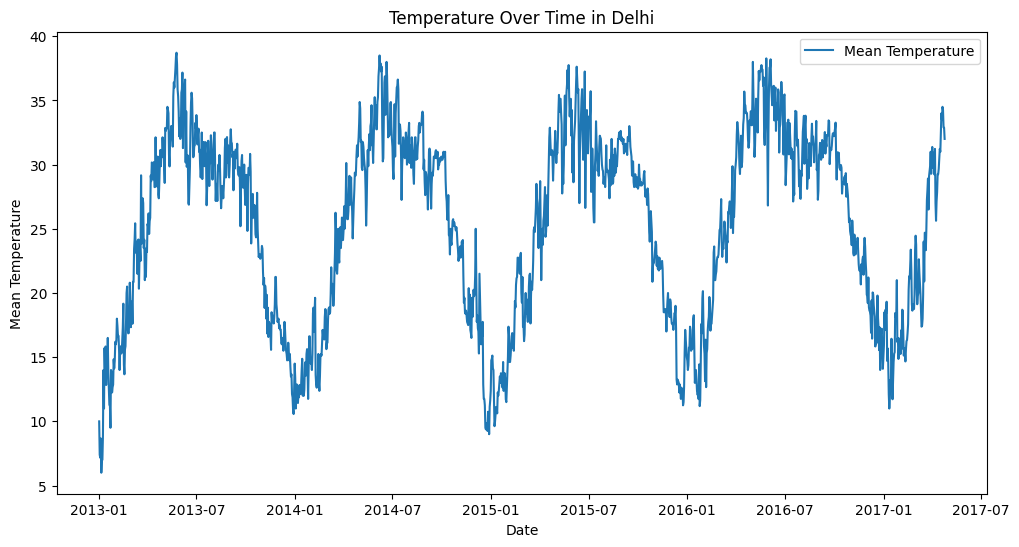

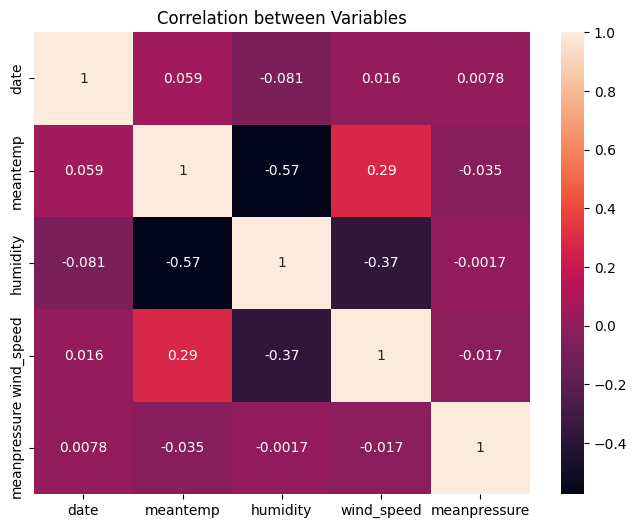

In [8]:
# Plot temperature over time
plt.figure(figsize=(12,6))
plt.plot(data['date'], data['meantemp'], label='Mean Temperature')
plt.xlabel('Date')
plt.ylabel('Mean Temperature')
plt.title('Temperature Over Time in Delhi')
plt.legend()
plt.show()

# Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(data.corr(), annot=True)
plt.title('Correlation between Variables')
plt.show()


Creating new features from the existing data to improve model performance.

In [10]:
# Extract year, month, and day from the date
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month
data['day'] = data['date'].dt.day

# Create lag features
data['meantemp_lag1'] = data['meantemp'].shift(1)

# Create rolling mean for temperature
data['meantemp_roll_mean'] = data['meantemp'].rolling(window=7).mean()

# Drop rows with NaN values created by lag/rolling
data.dropna(inplace=True)


Training a machine learning model to predict temperatures.

In [11]:
# Define features and target variable
features = ['humidity', 'wind_speed', 'meanpressure', 'meantemp_lag1', 'meantemp_roll_mean']
target = 'meantemp'

# Split data into training and testing sets
X = data[features]
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Train a Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

Evaluating the model's performance on the test set

In [12]:
# Predict temperatures on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = model.score(X_test, y_test)

print(f'Mean Absolute Error: {mae:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')
print(f'R-squared Score: {r2:.2f}')


Mean Absolute Error: 1.10
Root Mean Squared Error: 1.40
R-squared Score: 0.95


Comparing predicted temperatures with actual values

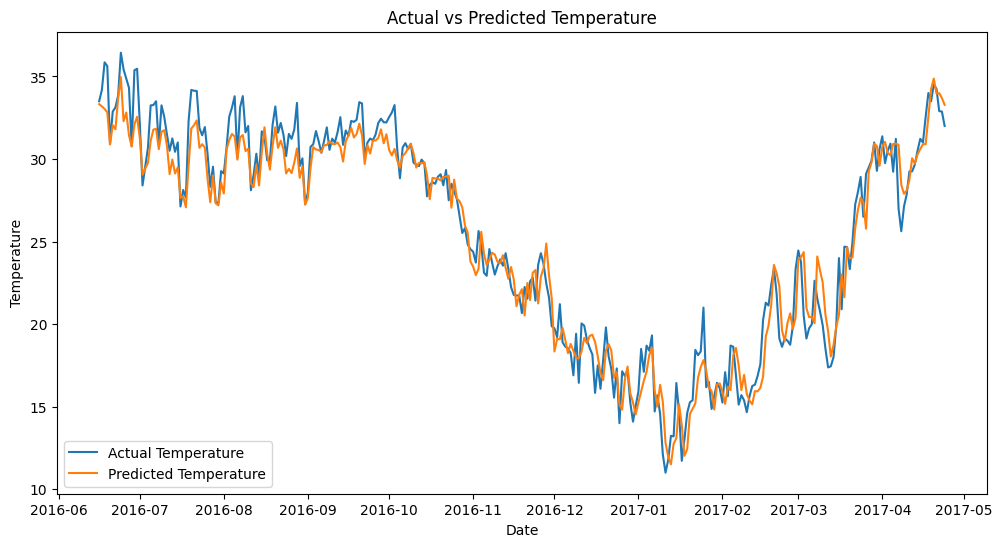

In [13]:
# Plot actual vs predicted temperatures
plt.figure(figsize=(12,6))
plt.plot(data['date'][-len(y_test):], y_test, label='Actual Temperature')
plt.plot(data['date'][-len(y_test):], y_pred, label='Predicted Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('Actual vs Predicted Temperature')
plt.legend()
plt.show()
